In [1]:
import sys, pickle
print(sys.executable)
import sklearn.preprocessing as pre, scipy, numpy as np, matplotlib.pyplot as plt, glob, os, pyemma
import pandas as pd, seaborn as sns, argparse

/home/mikejones/scratch-midway2/conda_envs/srv_env/bin/python


In [25]:
bars_on = True
plot_de = True

state_list = ["4bp Frayed\n(F4)", "Hybridized\n(H)", "5'-2bp Shifted\n(5S2)", 
              "3'-2bp Shifted\n(3S2)", "5'-4bp Shifted\n(5S4)", "3'-4bp Shifted\n(3S4)"]

sim_all = [0, 4.262716058, 8.422716067, 12.17185188, 14.99654324]
nn_all = [ 0, 0.25, 1.27, 5.18, 6.2] 
nn_all_node = [ 0, 4.92, 4.92, 9.855, 9.855] #5.69 F4

sim_end = [0, 15.51652247, 18.33531348, 23.68311324]
nn_end = [ 0, 5.44, 4, 8.94, 7.76] #11.47 F4
nn_end_node = [ 0, 12.33, 12.33, 15.83, 15.83] 

# account for state degeneracy on either end
sim_core = [-np.log(np.exp(-5.1)/2), 0]  # 5.89-.79
print(np.exp(5.1), np.exp(5.1)/2, np.log(np.exp(5.1)/2))
nn_core = [5.02, 0]
nn_core_node = [8.32, 0]

fe_list  = [sim_all, nn_all, nn_all_node, sim_end, nn_end, nn_end_node]

label_list = ['AT-all (MSM)', 'AT-all (NN)', 'AT-all no DE', 
              'GC-end (MSM)', 'GC-end (NN)', 'GC-end no DE']
color_list = ['orange', 'orange', 'orange', 'red', 'red', 'red']
start_list = [1, 1, 1, 1, 1, 1]
marker_list = ['s', '^', 'o', 's', '^', 'o']

164.0219072999017 82.01095364995085 4.406852819440054


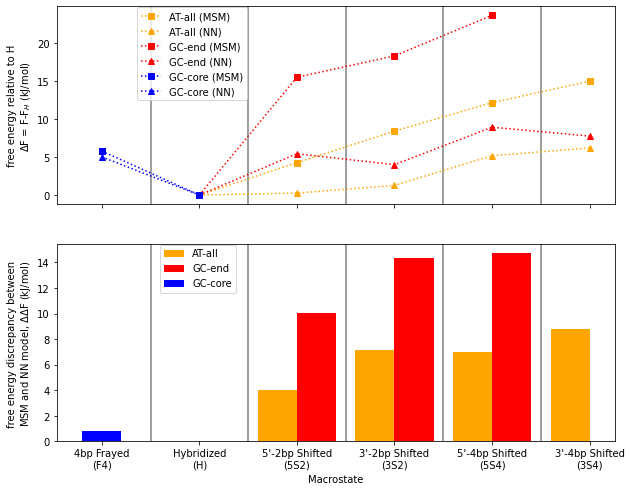

In [26]:
# if true plot nn predictions including dangling ends
plot_de = True

if bars_on: 
    fig, axes = plt.subplots(2, figsize=(10, 8), sharex=True)
    ax = axes[0]
else:       
    fig, ax = plt.subplots(figsize=(9, 5))
    
for x in range(len(state_list)-1):
    ax.axvline(0.5+x, linestyle='solid', color='grey')

for fe, label, color, start, marker in zip(
    fe_list, label_list, color_list, start_list, marker_list):

    xis = np.arange(start, start+len(fe))
    
    if (plot_de and 'no DE' not in label) or (not plot_de and 'with DE' not in label):
        ax.plot(xis, fe, linestyle='dotted', label=label, marker=marker, color=color)
    
ax.plot([0, 1], sim_core, color='blue', marker='s', label='GC-core (MSM)', linestyle='dotted')
if plot_de:
    ax.plot([0, 1], nn_core, color='blue', marker='^', label='GC-core (NN)', linestyle='dotted')
else:
    ax.plot([0, 1], nn_core_node, color='blue', marker='o', label='GC-core (NN)', linestyle='dotted')
        
#ax.set_title('Free energy relative to hybridized state')
ax.set_xticks(np.arange(len(state_list)))
ax.set_xticklabels(['' for i in range(len(state_list))])
#ax.set_xlabel('Macrostate')
ax.set_ylabel('free energy relative to H\n'+r'$\Delta$F = F-F$_H$ (kJ/mol)')
ax.legend(bbox_to_anchor=(0., 0., 0.35, 1.02))

if bars_on:
    alpha = 1
    width = 0.4 
    ax = axes[1]
    
    if plot_de:
        ax.bar(np.arange(1, 6)-.2, np.array(sim_all)-np.array(nn_all), color='orange', width=width, alpha=alpha, label='AT-all')
        ax.bar(np.arange(1, 5)+.2, np.array(sim_end)-np.array(nn_end[:4]), color='red', width=width, alpha=alpha, label='GC-end')
        ax.bar(np.arange(0, 2), np.array(sim_core)-np.array(nn_core), color='blue', width=width, alpha=alpha, label='GC-core')
    
    else:
        ax.bar(np.arange(1, 6)-.2, np.array(sim_all)-np.array(nn_all_node), color='orange', width=width, alpha=alpha, label='AT-all')
        ax.bar(np.arange(1, 5)+.2, np.array(sim_end)-np.array(nn_end_node[:4]), color='red', width=width, alpha=alpha, label='GC-end')
        ax.bar(np.arange(0, 2), np.array(sim_core)-np.array(nn_core_node), color='blue', width=width, alpha=alpha, label='GC-core')

    for x in range(len(state_list)-1):
        ax.axvline(0.5+x, linestyle='solid', color='grey')

    #ax.set_title('Free energy difference between NN and simulation')
    ax.set_xlabel('Macrostate')
    ax.set_ylabel('free energy discrepancy between \n' + r'MSM and NN model, $\Delta\Delta$F (kJ/mol)')
    ax.legend(bbox_to_anchor=(0., 0., 0.33, 1.02))
    
ax.set_xticks(np.arange(len(state_list)))
ax.set_xticklabels(state_list)
#ax.set_ylim(-3, 16)

if bars_on and plot_de: 
    suffix = '_bars_with_de'
elif bars_on and not plot_de:
    suffix = '_bars_no_de'
    #plt.subplots_adjust(hspace=0.3)
else:  
    suffix = ''
    
save_path = '/home/mikejones/scratch-midway2/srv/implicit/paper_figs/'
plt.savefig(f'{save_path}shifted_FEs{suffix}_delta.pdf', dpi=300, bbox_inches='tight')
plt.savefig(f'{save_path}shifted_FEs{suffix}_delta.png', dpi=300, bbox_inches='tight')

In [14]:

print(np.array(sim_all)-np.array(nn_all))
print(np.array(sim_end)-np.array(nn_end[:4]))
np.array(sim_core)-np.array(nn_core)

[0.         4.01271606 7.15271607 6.99185188 8.79654324]
[ 0.         10.07652247 14.33531348 14.74311324]


array([0.77314718, 0.        ])

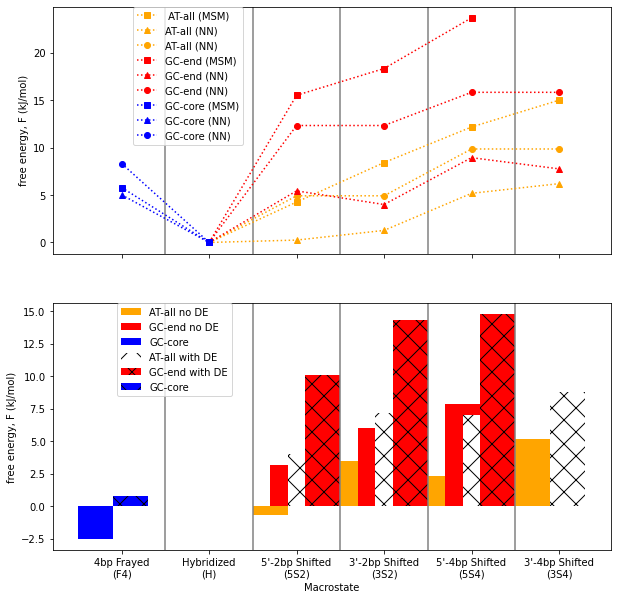

In [15]:
if bars_on: 
    fig, axes = plt.subplots(2, figsize=(10, 10), sharex=True)
    ax = axes[0]
else:       
    fig, ax = plt.subplots(figsize=(9, 5))
    
for x in range(len(state_list)-1):
    ax.axvline(0.5+x, linestyle='solid', color='grey')

for fe, label, color, start, marker in zip(
    fe_list, label_list, color_list, start_list, marker_list):

    xis = np.arange(start, start+len(fe))
    ax.plot(xis, fe, linestyle='dotted', label=label, marker=marker, color=color)
    
ax.plot([0, 1], sim_core, color='blue', marker='s', label='GC-core (MSM)', linestyle='dotted')
ax.plot([0, 1], nn_core, color='blue', marker='^', label='GC-core (NN)', linestyle='dotted')
ax.plot([0, 1], nn_core_node, color='blue', marker='o', label='GC-core (NN)', linestyle='dotted')

#ax.set_title('Free energy relative to hybridized state')
ax.set_xticks(np.arange(len(state_list)))
ax.set_xticklabels(['' for i in range(len(state_list))])
#ax.set_xlabel('Macrostate')
ax.set_ylabel('free energy, F (kJ/mol)')
ax.legend(bbox_to_anchor=(0., 0., 0.35, 1.02))

if bars_on:
    alpha = 1
    width = 0.4 
    ax = axes[1]
    ax.bar(np.arange(1, 6)-.3, np.array(sim_all)-np.array(nn_all_node), color='orange', width=width, alpha=alpha, label='AT-all no DE')
    ax.bar(np.arange(1, 5)-.1, np.array(sim_end)-np.array(nn_end_node[:4]), color='red', width=width, alpha=alpha, label='GC-end no DE')
    #ax.bar(np.arange(0, 2)-.3, np.array(sim_core)-np.array(nn_core_node), color='blue', width=width, alpha=alpha, label='GC-core')
        
    ax.bar(np.arange(1, 6)+.1, np.array(sim_all)-np.array(nn_all), color='orange', facecolor='white', width=width, alpha=alpha, label='AT-all with DE', hatch = 'X')
    ax.bar(np.arange(1, 5)+.3, np.array(sim_end)-np.array(nn_end[:4]), color='red', width=width, alpha=alpha, label='GC-end with DE', hatch = 'X')
    ax.bar(np.arange(0, 2)+.1, np.array(sim_core)-np.array(nn_core), color='blue', width=width, alpha=alpha, label='GC-core', hatch = 'X')
    
    for x in range(len(state_list)-1):
        ax.axvline(0.5+x, linestyle='solid', color='grey')

    #ax.set_title('Free energy difference between NN and simulation')
    ax.set_xlabel('Macrostate')
    ax.set_ylabel('free energy, F (kJ/mol)')
    ax.legend(bbox_to_anchor=(0., 0., 0.33, 1.02))
    
ax.set_xticks(np.arange(len(state_list)))
ax.set_xticklabels(state_list)

if bars_on: 
    suffix = '_bars'
    #plt.subplots_adjust(hspace=0.3)
else:  
    suffix = ''
    
save_path = '/home/mikejones/scratch-midway2/srv/implicit/paper_figs/'
plt.savefig(f'{save_path}shifted_FEs{suffix}.pdf', dpi=300, bbox_inches='tight')
plt.savefig(f'{save_path}shifted_FEs{suffix}.png', dpi=300, bbox_inches='tight')

In [16]:
print(np.array(sim_all)-np.array(nn_all))
print(np.array(sim_end)-np.array(nn_end)[:-1])
print(np.array(sim_core)-np.array(nn_core))

[0.         4.01271606 7.15271607 6.99185188 8.79654324]
[ 0.         10.07652247 14.33531348 14.74311324]
[0.77314718 0.        ]
